# Chapter 3 Exercises

## 3.1

Consider the National Football League data in Table B.1.
1. Fit a multiple linear regression model relating the number of games won to the team's passing yardage ($x_2$), the percentage of rushing plays ($x_7$), and the opponents' yards rushing ($x_8$).

In [1]:
import pandas as pd
import linear_regression as lr

data = pd.read_csv("datasets/b1.csv")

x_data = data[["x2", "x7", "x8"]].values
y_data = data["y"].values

model = lr.MultipleLinearRegression(x_data, y_data)
print(model)

Multiple linear regression model trained on 28 observations with 4 parameters.
The estimated parameters are: 
   - intercept: -1.8084
   - x1: 0.0036
   - x2: 0.1940
   - x3: -0.0048



2. Construct the analysis-of-variance table and test for significance of regression.

Analysis of variance identity breakdown:
  - total sum of squares (SST): 326.96,
  - regression sum of squares (SSR): 257.09,
  - residual sum of squares (SSRes): 69.87,

Assuming that the errors are normally distributed, we can use the F-test to check if the model is significant.
The H0 hypothesis being tested is: b1 = b2 = ... = bp = 0.
The F-statistic is: 29.44
The 0.95 quantile of the F-distribution with 3 and 24 degrees of freedom is: 3.01
The model is significant; the hypothesis H0: b1 = b2 = ... = bp = 0 is rejected.

The figure below shows the PDF for the F(p-1, n-p) distribution, and the value of the F-statistic, along with the 95% quantile.


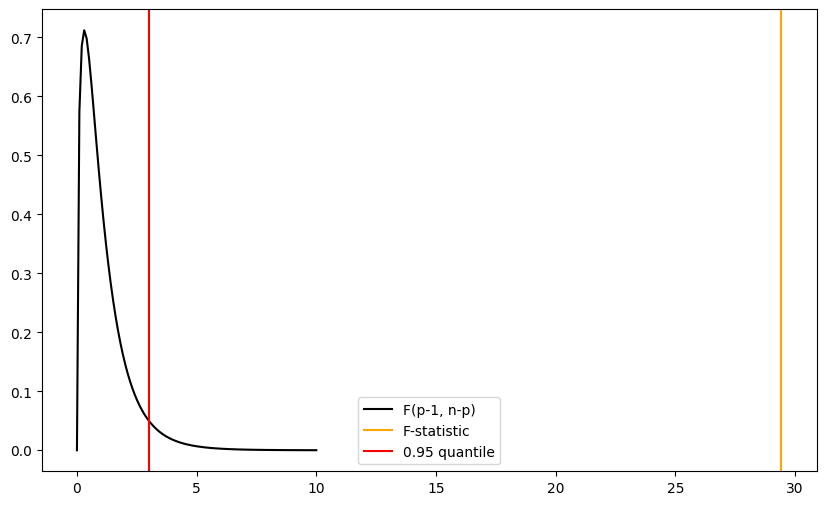

In [3]:
model.analysis_of_variance()

3. Calculate $t$ statistics for testing the hypotheses $H_0: b_2 = 0, H_0: b_7 = 0, and H_0: b_8 = 0$. What conclusions can you draw about the roles the variables $x_2, x_7$, and $x_8$ play in the model?

In [4]:
model.individual_parameter_significance()

#------------------------------------------------------------------
Running the t-test for significance of parameter b0...
   - value of t statistic:  -0.22888295653851262
   - value of t statistic boundary:  2.063898561628021
   - H0 hypothesis b0 = 0 is: NOT REJECTED

#------------------------------------------------------------------
Running the t-test for significance of parameter b1...
   - value of t statistic:  5.177090239988905
   - value of t statistic boundary:  2.063898561628021
   - H0 hypothesis b1 = 0 is: REJECTED

#------------------------------------------------------------------
Running the t-test for significance of parameter b2...
   - value of t statistic:  2.198261682783285
   - value of t statistic boundary:  2.063898561628021
   - H0 hypothesis b2 = 0 is: REJECTED

#------------------------------------------------------------------
Running the t-test for significance of parameter b3...
   - value of t statistic:  -3.7710364517287562
   - value of t statistic boun

4. Calculate $R^2$ and $R^2_{Adj}$ for this model.

In [5]:
model.coefficient_of_determination_analysis(verbose = True)

The coefficient of determination R^2 is: 0.79
The adjusted coefficient of determination R^2 is: 0.76


{'r2': 0.7863069233111879, 'r2_adj': 0.7595952887250865}

5. Using the partial $F$ test, determine the contribution of $x_7$ to the model. How is this partial $F$ statistic related to the $t$ test for $b_7$ calculated in part $c$ above?

Testing the overall significance of the regressors with indices: [2]...

H0: bi=0 for all i in [2]
The residual sum of squares for the full model is: 257.09
The residual sum of squares for the simple model is: 243.03
The difference in residual sum of squares is: 14.07
The F statistic is: 4.83
For alpha = 0.05, the 0.95 quantile of the F distribution with 1 and 24 degrees of freedom is: 4.26
The H0 hypothesis is: REJECTED


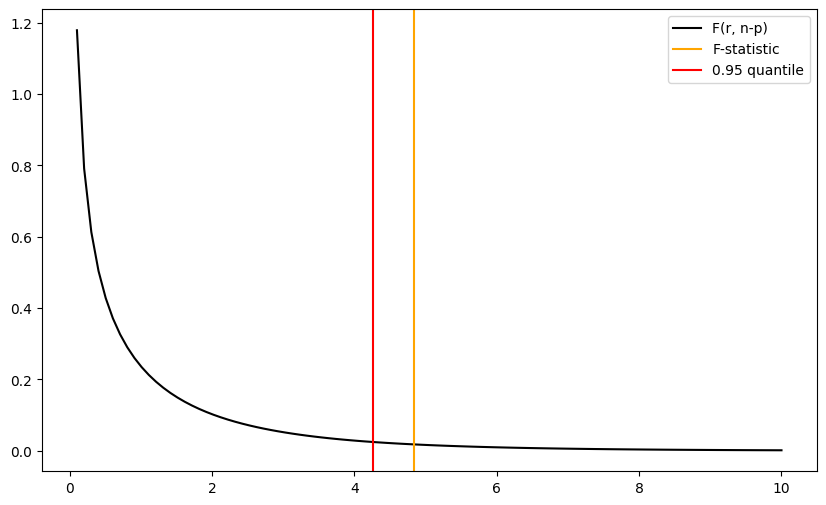

4.832354426020784

In [6]:
model.contribution_set_of_regressors([2], verbose = True)

## 3.2

Using the results of Problem 3.1, show numerically that the square of the simple correlation coefficient between the observed values $y_i$ and the fitted values $\hat{y}_i$ equals $R^2$.

In [12]:
def corr(x, y):
    """
    Calculates the correlation between x, and y.
    """

    x_mean = sum(x) / len(x)
    y_mean = sum(y) / len(y)

    numerator = sum([(x[i] - x_mean) * (y[i] - y_mean) for i in range(len(x))])
    denominator = sum([(x[i] - x_mean)**2 for i in range(len(x))]) * sum([(y[i] - y_mean)**2 for i in range(len(y))])

    return numerator / denominator**(1/2)

fitted_values = [model.predict(x) for x in x_data]
correlation = corr(fitted_values, y_data)

print("The R2 value for the model is: {:.4f}".format(model.coefficient_of_determination_analysis()["r2"]))
print("The square of the correlation between the fitted values and the observed values is: {:.4f}.".format(correlation**2))

The R2 value for the model is: 0.7863
The square of the correlation between the fitted values and the observed values is: 0.7863.


## 3.3

Refer to Problem 3.1.
1. Find a 95% CI on $b_7$.

In [13]:
coef_ll, coef_ul = model.regressor_parameter_confidence_interval(2, 0.05)
print("The 95% confidence interval for the coefficient of x7 is: ({:.4f}, {:.4f}).".format(coef_ll, coef_ul))

The 95% confidence interval for the coefficient of x7 is: (0.0119, 0.3761).


2. Find a 95% CI on the mean number of games won by a team when $x_2 = 2300, x_7 = 56.0$, and $x_8 = 2100$.

In [14]:
import numpy as np

x0 = np.array([2300, 56, 2100])
mean_response_ll, mean_response_ul = model.mean_response_confidence_interval(x0, 0.05)

print("The 95% confidence interval for the mean response at x0 = (2300, 56, 2100) is: ({:.4f}, {:.4f}).".format(mean_response_ll, mean_response_ul))

The 95% confidence interval for the mean response at x0 = (2300, 56, 2100) is: (6.4362, 7.9966).


## 3.4

Reconsider the National Football League data from Problem 3.1. Fit a model
to these data using only $x_7$ and $x_8$ as the regressors.
1. Test for significance of regression.

In [19]:
X_data_simple = data[["x7", "x8"]].values
y_data = data["y"].values

simple_model = lr.MultipleLinearRegression(X_data_simple, y_data)

simple_model.individual_parameter_significance()

#------------------------------------------------------------------
Running the t-test for significance of parameter b0...
   - value of t statistic:  1.8194521619174655
   - value of t statistic boundary:  2.0595385527532946
   - H0 hypothesis b0 = 0 is: NOT REJECTED

#------------------------------------------------------------------
Running the t-test for significance of parameter b1...
   - value of t statistic:  0.4057328132916151
   - value of t statistic boundary:  2.0595385527532946
   - H0 hypothesis b1 = 0 is: NOT REJECTED

#------------------------------------------------------------------
Running the t-test for significance of parameter b2...
   - value of t statistic:  -3.719116524016281
   - value of t statistic boundary:  2.0595385527532946
   - H0 hypothesis b2 = 0 is: REJECTED



2. Calculate $R^2$ and $R^2_{Adj}$ . How do these quantities compare to the values computed for the model in Problem 3.1, which included an additional regressor ($x_2$)?

In [18]:
r2_full_model = model.coefficient_of_determination_analysis()["r2"]
r2_adj_full_model = model.coefficient_of_determination_analysis()["r2_adj"]
r2_simple_model = simple_model.coefficient_of_determination_analysis()["r2"]
r2_adj_simple_model = simple_model.coefficient_of_determination_analysis()["r2_adj"]

print("The R2 value for the full model is: {:.4f}.".format(r2_full_model))
print("The adjusted R2 value for the full model is: {:.4f}.\n".format(r2_adj_full_model))

print("The R2 value for the simple model is: {:.4f}.".format(r2_simple_model))
print("The adjusted R2 value for the simple model is: {:.4f}.\n".format(r2_adj_simple_model))

higher_r2 = "FULL MODEL" if r2_full_model > r2_simple_model else "SIMPLE MODEL"
print("The {} has the higher R2 value.".format(higher_r2))

higher_r2_adj = "FULL MODEL" if r2_adj_full_model > r2_adj_simple_model else "SIMPLE MODEL"
print("The {} has the higher adjusted R2 value.".format(higher_r2_adj))

The R2 value for the full model is: 0.7863.
The adjusted R2 value for the full model is: 0.7596.

The R2 value for the simple model is: 0.5477.
The adjusted R2 value for the simple model is: 0.5115.

The FULL MODEL has the higher R2 value.
The FULL MODEL has the higher adjusted R2 value.


3. Calculate a 95% CI on $b_7$. Also find a 95% CI on the mean number of games won by a team when $x_7 = 56.0$ and $x_8 = 2100$. Compare the lengths of these CIs to the lengths of the corresponding CIs from Problem 3.3.

In [20]:
x0_simple = np.array([56, 2100])

mean_response_ll_simple, mean_response_ul_simple = simple_model.mean_response_confidence_interval(x0_simple, 0.05)

length_mean_response_full_model = mean_response_ul - mean_response_ll
length_mean_response_simple_model = mean_response_ul_simple - mean_response_ll_simple

print("The mean repsonse confidence interval for the full model at {} is ({:.4f}, {:.4f}).".format(x0, mean_response_ll, mean_response_ul))
print("The mean repsonse confidence interval for the simple model at {} is ({:.4f}, {:.4f}).".format(x0_simple, mean_response_ll_simple, mean_response_ul_simple))

print("The length of the mean response confidence interval for the full model is {:.4f}.".format(length_mean_response_full_model))
print("The length of the mean response confidence interval for the simple model is {:.4f}.".format(length_mean_response_simple_model))
longer_interval = "FULL MODEL" if length_mean_response_full_model > length_mean_response_simple_model else "SIMPLE MODEL"
print("The {} has the longer mean response confidence interval.".format(longer_interval))

The mean repsonse confidence interval for the full model at [2300   56 2100] is (6.4362, 7.9966).
The mean repsonse confidence interval for the simple model at [  56 2100] is (5.8286, 8.0238).
The length of the mean response confidence interval for the full model is 1.5604.
The length of the mean response confidence interval for the simple model is 2.1952.
The SIMPLE MODEL has the longer mean response confidence interval.


## 3.5

Consider the gasoline mileage data in Table B.3.
1. Fit a multiple linear regression model relatmg gasoline mileage $y$ (miles per gallon) to engine displacement $x_1$ and the number of carburetor barrels $x_6$.

In [22]:
gasoline_data = pd.read_csv("datasets/b3.csv")

X_data = gasoline_data[["x1", "x6"]].values
y_data = gasoline_data["y"].values

model_gasoline = lr.MultipleLinearRegression(X_data, y_data)
print(model_gasoline)

Multiple linear regression model trained on 32 observations with 3 parameters.
The estimated parameters are: 
   - b0: 31.0841
   - b1: -0.0475
   - b2: 1.2404



2. Construct the analysis-of-variance table and test for significance of regression.

Analysis of variance identity breakdown:
  - total sum of squares (SST): 1301.11,
  - regression sum of squares (SSR): 710.78,
  - residual sum of squares (SSRes): 590.32,

Assuming that the errors are normally distributed, we can use the F-test to check if the model is significant.
The H0 hypothesis being tested is: b1 = b2 = ... = bp = 0.
The F-statistic is: 17.46
The 0.95 quantile of the F-distribution with 2 and 29 degrees of freedom is: 3.33
The model is significant; the hypothesis H0: b1 = b2 = ... = bp = 0 is rejected.

The figure below shows the PDF for the F(p-1, n-p) distribution, and the value of the F-statistic, along with the 95% quantile.


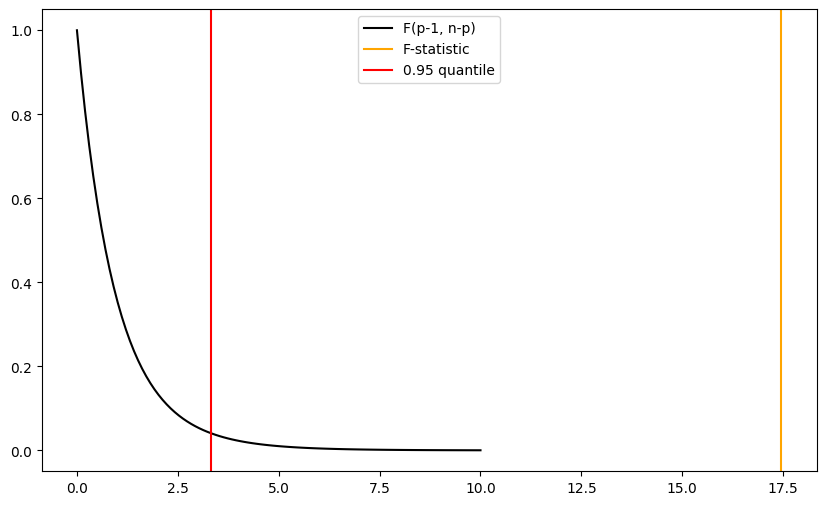

In [23]:
model_gasoline.analysis_of_variance()

3. Calculate $R^2$ and $R^2_{Adj}$ for this model. Compare this to the $R^2$ for the simple linear regression model relating mileage to engine displacement in Problem 2.4.

In [25]:
r2_full_model = model_gasoline.coefficient_of_determination_analysis()["r2"]
r2_adj_full_model = model_gasoline.coefficient_of_determination_analysis()["r2_adj"]

print("The R2 value for the full model is: {:.4f}.".format(r2_full_model))
print("The adjusted R2 value for the full model is: {:.4f}.\n".format(r2_adj_full_model))

simple_model = lr.SimpleLinearRegression(gasoline_data["x1"].values, gasoline_data["y"].values)
r2 = simple_model.coefficient_of_determination()

print("The R2 value for the simple model is: {:.4f}.".format(r2))

The R2 value for the full model is: 0.5463.
The adjusted R2 value for the full model is: 0.5150.

The R2 value for the simple model is: 0.5223.


4. Find a 95% CI for $b_1$.

In [27]:
b1_ll, b1_ul = model_gasoline.regressor_parameter_confidence_interval(1, 0.05)

print("The 95% confidence interval for the coefficient of x1 is: ({:.4f}, {:.4f}).".format(b1_ll, b1_ul))

The 95% confidence interval for the coefficient of x1 is: (-0.0662, -0.0287).


5. Compute the t statistics for testing H0: β1 = 0 and H0: β6 = 0. What conclusions can you draw?

In [26]:
model_gasoline.individual_parameter_significance()

#------------------------------------------------------------------
Running the t-test for significance of parameter b0...
   - value of t statistic:  13.506512479965782
   - value of t statistic boundary:  2.0452296421327034
   - H0 hypothesis b0 = 0 is: REJECTED

#------------------------------------------------------------------
Running the t-test for significance of parameter b1...
   - value of t statistic:  -5.171756410023294
   - value of t statistic boundary:  2.0452296421327034
   - H0 hypothesis b1 = 0 is: REJECTED

#------------------------------------------------------------------
Running the t-test for significance of parameter b2...
   - value of t statistic:  1.2393365317384584
   - value of t statistic boundary:  2.0452296421327034
   - H0 hypothesis b2 = 0 is: NOT REJECTED



6. Find a 95% CI on the mean gasoline mileage when $x_1 = 275$ in3 and $x_6 = 2$ barrels.

In [28]:
x0 = np.array([275, 2])

mean_response_ll, mean_response_ul = model_gasoline.mean_response_confidence_interval(x0, 0.05)

print("The 95% confidence interval for the mean response at x0 = (275, 2) is: ({:.4f}, {:.4f}).".format(mean_response_ll, mean_response_ul))

The 95% confidence interval for the mean response at x0 = (275, 2) is: (18.5414, 22.4808).


7. Find a 95% prediction interval for a new observation on gasoline mileage when $x_1 = 257$ in3 and $x_6 = 2$ barrels.

In [30]:
prediction_ll, prediction_ul = model_gasoline.prediction_confidence_interval(x0, 0.05)

print("The 95% prediction interval for the response at x0 = (275, 2) is: ({:.4f}, {:.4f}).".format(prediction_ll, prediction_ul))

The 95% prediction interval for the response at x0 = (275, 2) is: (11.0756, 29.9466).
